In [1]:
### Pt. 1 EDA and Preprocessing ###

In [2]:
# Here we will learn how to perform a classification task with TF 

In [3]:
# We will also focus on how to identify and deal with overfitting through early stopping callbacks and dropout layers

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\stavt\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

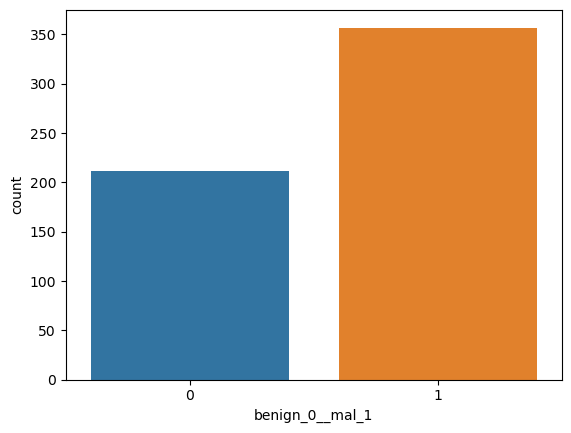

In [11]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

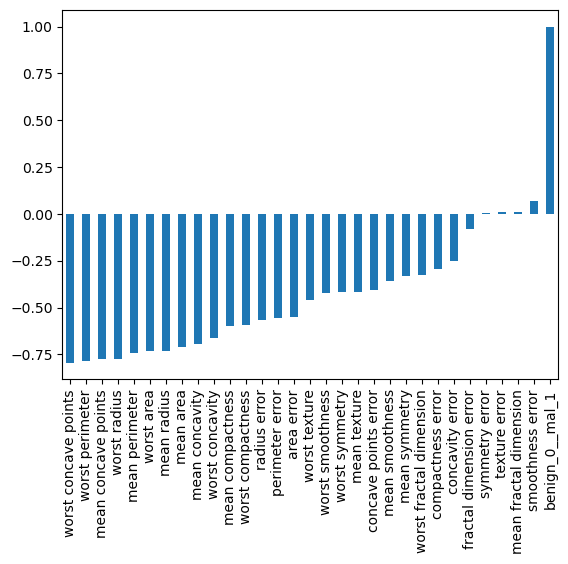

In [14]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

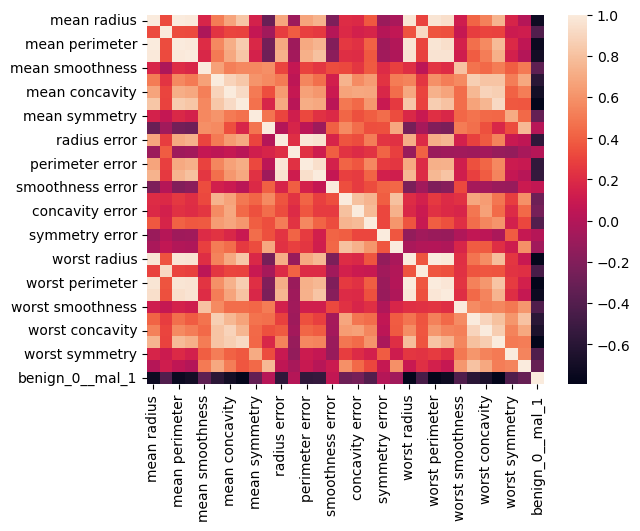

In [15]:
sns.heatmap(df.corr())

In [16]:
# Now train_test_split and scaling the data

In [17]:
X = df.drop('benign_0__mal_1',axis=1).values

In [18]:
y=df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
### Pt. 2 Creating Model, Dealing With Overfitting, and Evaluation ###

In [26]:
from tensorflow.keras.models import Sequential 

In [27]:
from tensorflow.keras.layers import Dense,Dropout

In [29]:
X_train.shape

(426, 30)

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [31]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6751 - val_loss: 0.6642
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6375 - val_loss: 0.6258
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5937 - val_loss: 0.5814
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5482 - val_loss: 0.5318
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4992 - val_loss: 0.4802
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4510 - val_loss: 0.4281
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3563 - val_loss: 0.3345
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3175 - val_loss: 0.2979
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2866 - val_loss: 0.2658
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0518 - val_loss: 0.1077
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.1187
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0497 - val_loss: 0.1125
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0499 - val_loss: 0.1064
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0491 - val_loss: 0.1165
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.1084
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0520 - val_loss: 0.1129
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0483 - val_loss: 0.1102
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0509 - val_loss: 0.1195
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.1110
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0381 - val_loss: 0.1188
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.1204
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.1143
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.1326
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.1142
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.1296
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0415 - val_loss: 0.1092
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0431 - val_loss: 0.1349
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.1191
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.1216
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0342 - val_loss: 0.1336
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0334 - val_loss: 0.1259
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.1303
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.1276
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.1401
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1314
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0309 - val_loss: 0.1305
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0309 - val_loss: 0.1352
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.1259
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0326 - val_loss: 0.1507
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.1367
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.1591
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.1572
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.1475
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 0.1646
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.1398
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.1631
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1394
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.1416
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0249 - val_loss: 0.1487
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.1671
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.1862
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.1760
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.2071
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.1687
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.1936
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0162 - val_loss: 0.1825
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.1957
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 0.1839
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0166 - val_loss: 0.1774
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.2257
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.2360
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.2138
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.2344
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0119 - val_loss: 0.2307
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.2185
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.2364
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.2286
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 0.2315
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.2287
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.2863
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.2543
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.3150
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0128 - val_loss: 0.2596
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.2728
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.2610
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.2848
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0082 - val_loss: 0.2754
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.2761
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0072 - val_loss: 0.2582
Epoc

In [32]:
losses = pd.DataFrame(model.history.history)

In [33]:
losses

,loss,val_loss
0,0.675094,0.664163
1,0.637528,0.625821
2,0.593749,0.581443
3,0.548182,0.531781
4,0.499213,0.480181
...,...,...
595,0.009922,0.344830
596,0.008983,0.248812
597,0.009696,0.307417
598,0.006125,0.257598


<AxesSubplot:>

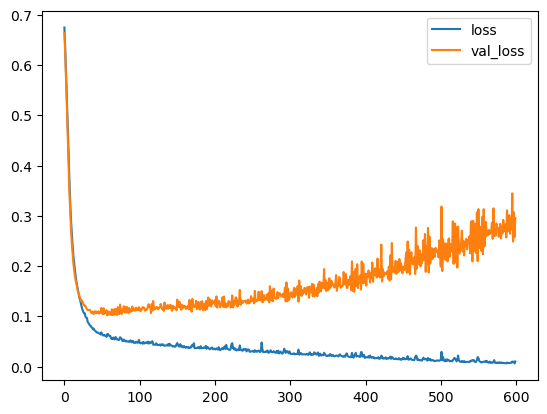

In [35]:
losses.plot()

# Below is a clear indication of overfitting the loss for the training data set continues to decrease however the loss
# for the test data set begins to increase substantially showing overfitting 
# basically the model is great for the training data set but terrible for the data set it has not seen which means
# it has overfitted to the training data 

In [42]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# Here we are trying to mode=minimize the moniter=val_loss
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [45]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6760 - val_loss: 0.6652
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6510 - val_loss: 0.6435
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6259 - val_loss: 0.6187
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5991 - val_loss: 0.5882
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5638 - val_loss: 0.5444
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5192 - val_loss: 0.5014
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4785 - val_loss: 0.4589
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4377 - val_loss: 0.4134
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3902 - val_loss: 0.3510
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3381 - val_loss: 0.2995
Epoch 11/

In [46]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

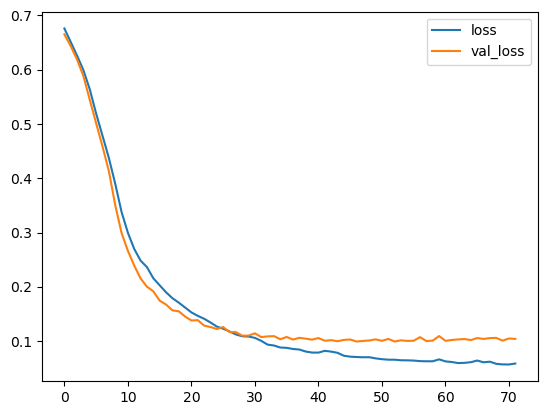

In [47]:
model_loss.plot()

In [55]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential 

model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))

model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [56]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6940 - val_loss: 0.6765
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6761 - val_loss: 0.6584
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6563 - val_loss: 0.6426
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6618 - val_loss: 0.6273
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6240 - val_loss: 0.6094
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6267 - val_loss: 0.5851
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5898 - val_loss: 0.5557
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5768 - val_loss: 0.5240
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5358 - val_loss: 0.4913
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5639 - val_loss: 0.4670
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1495 - val_loss: 0.0963
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1227 - val_loss: 0.0926
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1172 - val_loss: 0.0903
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1350 - val_loss: 0.0895
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1422 - val_loss: 0.0954
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1235 - val_loss: 0.0954
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1418 - val_loss: 0.1014
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1016 - val_loss: 0.0944
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1205 - val_loss: 0.0937
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0970 - val_loss: 0.0899
Epoch 93/600


In [50]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

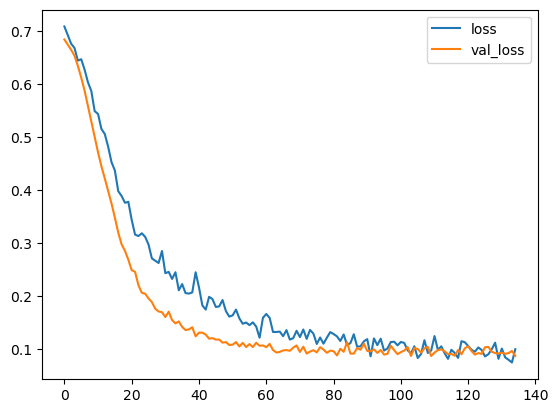

In [52]:
model_loss.plot()

In [58]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 1ms/step


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [62]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
